<a href="https://colab.research.google.com/github/glukonatic/mystudy/blob/master/III_PRO_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Light. Вариант 1




---


Перепишите ноутбук по распознаванию рукописных цифр, восстановив следующие операции:
1.   Импорт библиотек.
2.   Загрузка базы mnist.
3.   Нормирование и преобразование x_train и y_train.
4.   Создание нейронной сети.
5.   Обучение нейронной сети.

Можно смотреть в ноутбук с занятия, но код необходимо писать самостоятельно.


---



In [0]:
#@title 1. Импорт библиотек

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import pylab as pl
import pandas as pd
import math
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

In [2]:
#@title 2. Загрузка базы mnist

(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#@title 3. Нормирование и преобразование x_train и y_train

x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [0]:
#@title 4. Создание нейронной сети
#@markdown Для построения модели можно указать число нейронов для скрытого слоя (слоёв). defNeyrons1 - число нейронов в первом скрытом слое, defNeyrons2 - во втором. Можно указать для второго слоя 0 - второй слой добавляться не будет. Эти параметры - глобальные для всех блоков.

defNeyrons1 = 100  #@param {type: "slider", min: 10, max: 1000}
defNeyrons2 = 50  #@param {type: "slider", min: 0, max: 1000}

#@markdown ---

defActivation = 'relu'

model = Sequential()
model.add(Dense(defNeyrons1, input_dim=784, activation=defActivation))
if defNeyrons2 > 0:
  model.add(Dense(defNeyrons2, activation=defActivation))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [5]:
#@title 5. Обучение нейронной сети
#@markdown Для обучения модели можно указать величину выборок defBatchSize, количество эпох defEpochs, параметром defVerbose можно установить отображение процесса обучения. Эти параметры - глобальные для всех блоков.

defBatchSize = 128  #@param {type: "slider", min: 10, max: 1000}
defEpochs = 10  #@param {type: "slider", min: 0, max: 20}
defVerbose = 0  #@param {type: "slider", min: 0, max: 1}

#@markdown ---

model.fit(x_train, y_train, batch_size=defBatchSize, epochs=defEpochs, verbose=defVerbose)

# Light. Вариант 2



---


Проведите серию экспериментов по перебору гиперпараметров нейронной сети, созданной на занятии.
1.   Поменяйте количество нейронов в сети, используя следующие значения:
  *   один слой 10 нейронов
  *   один слой 100 нейронов
  *   один слой 5000 нейронов
2.   Поменяйте активационную функцию в скрытых слоях с relu на linear.
3.   Поменяйте размеры batch_size:
  *   1
  *   10
  *   100
  *   Вся база (60000)
4.   Запишите в таблицу получившиеся точности.
5.   Напишите выводы по результатам проведенных тестов.


---



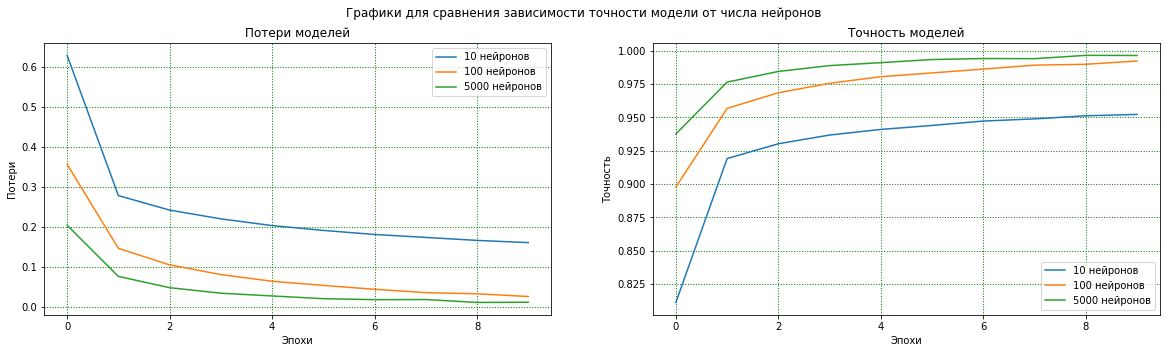

In [6]:
#@title 1. Поменяйте количество нейронов в сети.
#@markdown Ниже можно изменить число нейронов, чтобы указать отличные от задания. По умолчанию - 10, 100, 5000 нейронов.

neyronsModel1 = 10  #@param {type: "number"}
neyronsModel2 = 100  #@param {type: "number"}
neyronsModel3 = 5000  #@param {type: "number"}

#@markdown ---


# Определим функцию для дальнейших экспериментов
def runFit(NUMOFNEYRONS,BATCHSIZE,EPOCHS,VERBOSE,ACTIVATION):
  '''
    Функция runFit, создающая модель, как на занятии, но с меньшим числом нейронов, 
    с определенным количеством нейронов в скрытом слое.
    На вход принимает два значения:
    NUMOFNEYRONS - целочисленное значение, число нейронов
    BATCHSIZE - размер "пачки" примеров для обучения модели
    EPOCHS - количество эпох для обучения модели
    VERBOSE - флаг для вывода информации о компиляции модели, 0 или 1
    ACTIVATION - активационная функция в одном из скрытых слоёв (во втором)
    Функция возвращает объект history созданной модели
  '''
  model = Sequential()
  model.add(Dense(NUMOFNEYRONS, input_dim=784, activation=ACTIVATION))
  if defNeyrons2 > 0 :
    model.add(Dense(defNeyrons2, activation=ACTIVATION))
  model.add(Dense(10, activation="softmax"))
  model.compile(loss="categorical_crossentropy", optimizer="adam", 
                metrics=["accuracy"])
  return model.fit(x_train, y_train, batch_size=BATCHSIZE, 
                   epochs=EPOCHS, verbose=VERBOSE)


# Сформируем кастомные заголовки для графиков
labelModel1 = str(neyronsModel1) + ' нейронов'
labelModel2 = str(neyronsModel2) + ' нейронов'
labelModel3 = str(neyronsModel3) + ' нейронов'
labels = [labelModel1, labelModel2, labelModel3]

# Запустим три модели с указанным числом нейронов в каждой
historyModelN1 = runFit(neyronsModel1,defBatchSize,defEpochs,defVerbose,defActivation)
historyModelN2 = runFit(neyronsModel2,defBatchSize,defEpochs,defVerbose,defActivation)
historyModelN3 = runFit(neyronsModel3,defBatchSize,defEpochs,defVerbose,defActivation)

# Графики
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,5))
f.suptitle('Графики для сравнения зависимости точности модели от числа нейронов')

# Отрисуем изменение величины потерь в зависимости от числа нейронов
ax1.plot(historyModelN1.history['loss'])
ax1.plot(historyModelN2.history['loss'])
ax1.plot(historyModelN3.history['loss'])
ax1.set_title('Потери моделей')
ax1.set_ylabel('Потери')
ax1.set_xlabel('Эпохи')
ax1.grid(color='g', linestyle=':', linewidth=1)
ax1.legend(labels, loc='upper right')

# Отрисуем изменение величины точности в зависимости от числа нейронов
ax2.plot(historyModelN1.history['accuracy'])
ax2.plot(historyModelN2.history['accuracy'])
ax2.plot(historyModelN3.history['accuracy'])
ax2.set_title('Точность моделей')
ax2.set_ylabel('Точность')
ax2.set_xlabel('Эпохи')
ax2.grid(color='g', linestyle=':', linewidth=1)
ax2.legend(labels, loc='lower right')

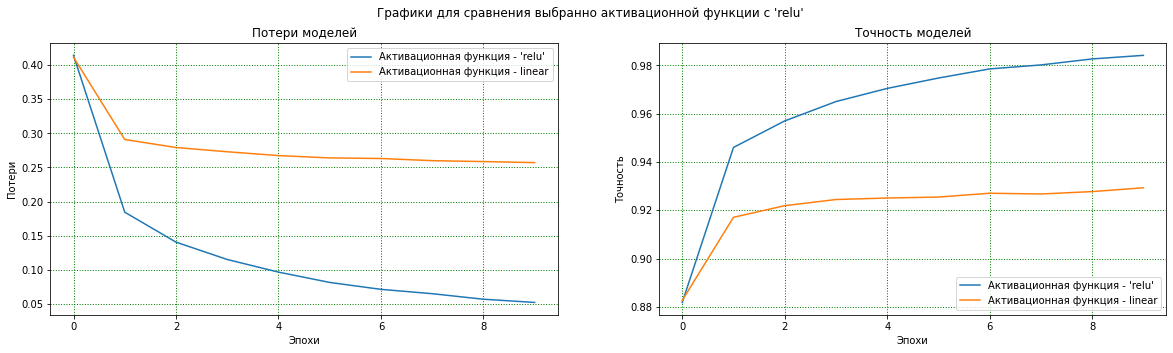

In [7]:
#@title 2. Поменяйте активационную функцию в скрытых слоях с relu на linear.
#@markdown Ниже можно изменить активационную функцию (не 'relu'). По умолчанию - 'linear'.

customActivation = "linear"  #@param ['linear', 'tanh', 'elu', 'selu', 'sigmoid', 'hard_sigmoid', 'exponential']

#@markdown ---


# Сформируем кастомные заголовки для графиков
labelModel1 = 'Активационная функция - \'relu\''
labelModel2 = 'Активационная функция - ' + customActivation
labels = [labelModel1, labelModel2]

# Запустим три модели с указанной активационной функцией
historyRelu = runFit(defNeyrons2,defBatchSize,defEpochs,defVerbose,'relu')
historyCustom = runFit(defNeyrons2,defBatchSize,defEpochs,defVerbose,customActivation)

# Графики
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,5))
f.suptitle('Графики для сравнения выбранно активационной функции с \'relu\'')

# Отрисуем изменение величины потерь в зависимости от активационной функции
ax1.plot(historyRelu.history['loss'])
ax1.plot(historyCustom.history['loss'])
ax1.set_title('Потери моделей')
ax1.set_ylabel('Потери')
ax1.set_xlabel('Эпохи')
ax1.grid(color='g', linestyle=':', linewidth=1)
ax1.legend(labels, loc='upper right')

# Отрисуем изменение величины точности в зависимости от активационной функции
ax2.plot(historyRelu.history['accuracy'])
ax2.plot(historyCustom.history['accuracy'])
ax2.set_title('Точность моделей')
ax2.set_ylabel('Точность')
ax2.set_xlabel('Эпохи')
ax2.grid(color='g', linestyle=':', linewidth=1)
ax2.legend(labels, loc='lower right')

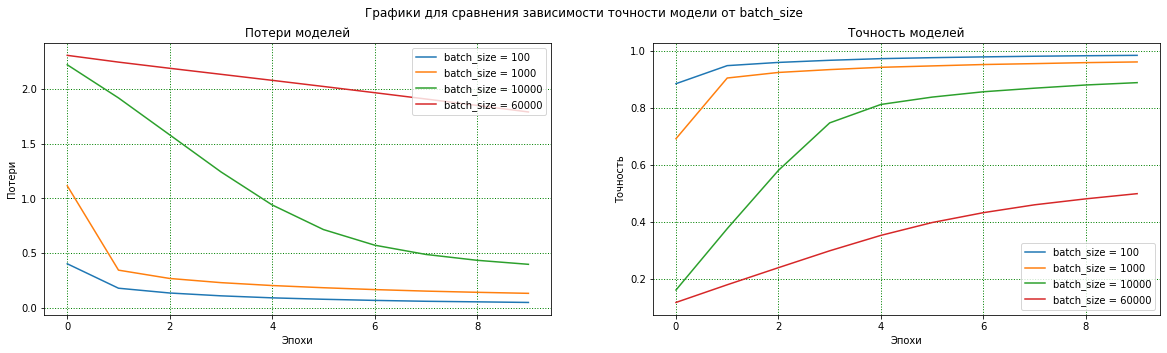

In [8]:
#@title 3. Поменяйте размеры batch_size.
#@markdown Ниже можно изменить число нейронов, чтобы указать отличные от задания. По умолчанию: 1, 10, 100, 60000. Внимание! При batch_size < 50 возможно длительное ожидание завершения работы блока.

batchModel1 = 100  #@param {type: "number"}
batchModel2 = 1000  #@param {type: "number"}
batchModel3 = 10000  #@param {type: "number"}
batchModel4 = 60000  #@param {type: "number"}

#@markdown ---


# Сформируем кастомные заголовки для графиков
labelModel1 = 'batch_size = ' + str(batchModel1)
labelModel2 = 'batch_size = ' + str(batchModel2)
labelModel3 = 'batch_size = ' + str(batchModel3)
labelModel4 = 'batch_size = ' + str(batchModel4)
labels = [labelModel1, labelModel2, labelModel3, labelModel4]

# Запустим четыре модели с указанным числом batch_size в каждой
historyModelB1 = runFit(defNeyrons2, batchModel1, defEpochs, defVerbose, defActivation)
historyModelB2 = runFit(defNeyrons2, batchModel2, defEpochs, defVerbose, defActivation)
historyModelB3 = runFit(defNeyrons2, batchModel3, defEpochs, defVerbose, defActivation)
historyModelB4 = runFit(defNeyrons2, batchModel4, defEpochs, defVerbose, defActivation)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,5))
f.suptitle('Графики для сравнения зависимости точности модели от batch_size')

# Отрисуем изменение величины потерь в зависимости от batch_size
ax1.plot(historyModelB1.history['loss'])
ax1.plot(historyModelB2.history['loss'])
ax1.plot(historyModelB3.history['loss'])
ax1.plot(historyModelB4.history['loss'])
ax1.set_title('Потери моделей')
ax1.set_ylabel('Потери')
ax1.set_xlabel('Эпохи')
ax1.grid(color='g', linestyle=':', linewidth=1)
ax1.legend(labels, loc='upper right')

# Отрисуем изменение величины точности в зависимости от batch_size
ax2.plot(historyModelB1.history['accuracy'])
ax2.plot(historyModelB2.history['accuracy'])
ax2.plot(historyModelB3.history['accuracy'])
ax2.plot(historyModelB4.history['accuracy'])
ax2.set_title('Точность моделей')
ax2.set_ylabel('Точность')
ax2.set_xlabel('Эпохи')
ax2.grid(color='g', linestyle=':', linewidth=1)
ax2.legend(labels, loc='lower right')

4. Запишите в таблицу получившиеся точности.

In [9]:
#@title 4.1 Таблица экспериментов с изменением числа нейронов.

neyronsData = pd.DataFrame(index=range(1,defEpochs+1))
neyronsData[neyronsModel1] = historyModelN1.history['accuracy']
neyronsData[neyronsModel2] = historyModelN2.history['accuracy']
neyronsData[neyronsModel3] = historyModelN3.history['accuracy']
print('Строки - номера эпох, столбцы - число нейронов в скрытом слое')
neyronsData

Строки - номера эпох, столбцы - число нейронов в скрытом слое


,10,100,5000
1,0.811350,0.897817,0.937617
2,0.919150,0.956733,0.976433
3,0.930233,0.968467,0.984417
4,0.936783,0.975550,0.988800
5,0.940983,0.980483,0.991017
6,0.943950,0.983333,0.993350
7,0.947267,0.986183,0.994100
8,0.948883,0.989167,0.994000
9,0.951217,0.989783,0.996483
10,0.952233,0.992267,0.996383


In [10]:
#@title 4.2 Таблица экспериментов с изменением активационной функции.

activationData = pd.DataFrame(index=range(1,defEpochs+1))
activationData['relu'] = historyRelu.history['accuracy']
activationData[customActivation] = historyCustom.history['accuracy']
print('Строки - номера эпох, столбцы - название активационной функции')
activationData

Строки - номера эпох, столбцы - название активационной функции


,relu,linear
1,0.881800,0.882650
2,0.946033,0.917083
3,0.957017,0.921883
4,0.965033,0.924450
5,0.970483,0.925067
6,0.974783,0.925467
7,0.978567,0.927050
8,0.980217,0.926733
9,0.982700,0.927733
10,0.984183,0.929300


In [11]:
#@title 4.3 Таблица экспериментов с изменением batch_size.

#print(historyOfFirstModel,historyOfSecondModel,historyOfThirdModel,historyOfFourthModel)
batchSizeData = pd.DataFrame(index=range(1,defEpochs+1))
batchSizeData[batchModel1] = historyModelB1.history['accuracy']
batchSizeData[batchModel2] = historyModelB2.history['accuracy']
batchSizeData[batchModel3] = historyModelB3.history['accuracy']
batchSizeData[batchModel4] = historyModelB4.history['accuracy']
print('Строки - номера эпох, столбцы - размер batch_size')
batchSizeData

Строки - номера эпох, столбцы - размер batch_size


,100,1000,10000,60000
1,0.885183,0.691783,0.159733,0.116000
2,0.948650,0.905117,0.375483,0.178167
3,0.959950,0.924683,0.580533,0.238317
4,0.967450,0.934717,0.747400,0.297633
5,0.973217,0.942750,0.812200,0.351867
6,0.976633,0.947700,0.838050,0.397000
7,0.979450,0.952550,0.856783,0.431717
8,0.981717,0.955733,0.869433,0.459367
9,0.983467,0.959250,0.880617,0.480300
10,0.984800,0.961633,0.888833,0.498483


5. Напишите выводы по результатам проведенных тестов.

Выводы:

1. 

# Pro



---


Распознайте рукописную цифру, созданную вами с помощью графического редактора (например, Paint).
Последовательность шагов:
1. В графическом редакторе рисуем произвольную цифру.
2. Сохраняем документ и загружаем его в Collaboratory.
3. С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
4. С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
5. Выполняем инверсию цветов, нормирование и решейп массива.
6. Выполняем распознавание собственной рукописной цифры.

Реализуйте тот же алгоритм для написанной на листе от руки цифры (для этого необходимо сделать дополнительную предобработку изображения).


---




In [12]:
#@title 1-2. В графическом редакторе рисуем произвольную цифру. Сохраняем документ и загружаем его в Collaboratory.

from google.colab import files

files.upload()
print('Имеющиеся файлы в директории, в том числе загруженные:')
!ls

MessageError: ignored

In [0]:
#@title 3. С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
#@markdown Укажите имя загруженного файла

filename = 'file.png'  #@param {type: "string"}

#@markdown ---

img = image.load_img(filename, target_size=(28, 28), color_mode = 'grayscale')
img

In [0]:
#@title 4. С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.

imageArray = image.img_to_array(img).reshape(28,28)
plt.imshow(Image.fromarray(imageArray).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
print('Отрисуем массив, полученный из файла загруженой цифры, на экран')
plt.show()

In [0]:
#@title 5. Выполняем инверсию цветов, нормирование и решейп массива.

# Инверсия цветов
imageArray = 255 - imageArray
plt.imshow(Image.fromarray(imageArray).convert('RGBA'))
print('Отрисуем инвертированную картинку на экран')
plt.show()

# Решейп
imageArrayReshape = imageArray.reshape(784,)
print('Размерность массива до решейпа',imageArrayReshape.shape)
imageArrayReshape = np.expand_dims(imageArrayReshape, axis=0)
print('Размерность массива после решейпа',imageArrayReshape.shape)

# Нормирование
imageArray = imageArray.astype('float32')
imageArray = imageArray / 255


In [0]:
#@title 6. Выполняем распознавание собственной рукописной цифры.

prediction = model.predict(imageArrayReshape)
print('Выходной вектор результата распознавания:',prediction)
prediction = np.argmax(prediction)
print('Модель распознала цифру:',prediction)

Saving 9.jpeg to 9 (2).jpeg
Отрисуем загруженую цифру на экран
[[  6.   6.   6.   6.   6.   6.   6.   6.   5.   7.   3.   6.   6.   7.
    7.   9.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.]
 [  6.   6.   6.   6.   6.   6.   6.   6.   2.   7.   7.   7.   7.   4.
    5.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.]
 [  6.   6.   6.   6.   3.   4.  12. 183. 254. 255. 255. 255. 255. 255.
  255. 255. 140. 124.   2.   6.   6.   6.   6.   6.   6.   6.   6.   6.]
 [  6.   6.   6.   6.   7.   3. 255. 254. 255. 255. 255. 255. 255. 255.
  255. 255. 253. 255. 118.   8.   6.   6.   6.   6.   6.   6.   6.   6.]
 [  6.   6.   6.   6.   8. 255. 255. 255. 255. 255. 254. 255. 253. 254.
  255. 253. 255. 255. 252.   6.   6.   6.   6.   6.   6.   6.   6.   6.]
 [  6.   6.   6.   6.  59. 255. 255. 250. 255. 255. 247. 251. 255. 255.
  252. 255. 255. 255. 255. 138.   6.   6.   6.   6.   6.   6.   6.   6.]
 [  6.   6.   6.   6. 221. 251. 255. 254.   5.   5.   4.   6.   4. 

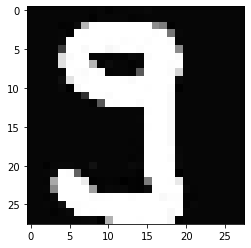

Отрисуем контрастированную картинку на экран


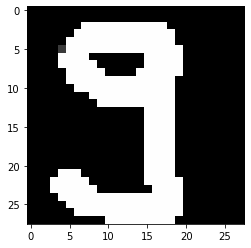

Отрисуем инвертированную картинку на экран


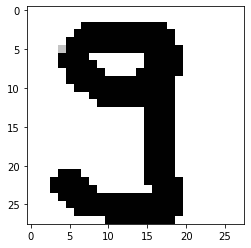

Выходной вектор результата распознавания: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Модель распознала цифру: 2


In [16]:
#@title Реализуйте тот же алгоритм для написанной на листе от руки цифры (для этого необходимо сделать дополнительную предобработку изображения). Здесь нам потребуется поработать с контрастностью картинки. Для этого вводится коэффициент контрастности (лучшее значение подбирается опытным путём). Так же нужно загрузить файл (при запуске ячейки отобразится панель загрузки).
from google.colab import files

uploadedFile = files.upload()

#Загрузка картинки

contrast = 1.36 #@param {type:"slider", min:0, max:10, step:0.01}

for key in uploadedFile.keys():
  filename = key
img = image.load_img(filename, target_size=(28, 28), color_mode = 'grayscale')

print('Отрисуем загруженую цифру на экран')
imageArray = image.img_to_array(img).reshape(28,28)
#print(imageArray)
plt.imshow(Image.fromarray(imageArray).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
plt.show()

def contrastingImage(img, coeff):
  '''
  Функция для повышения контрастности картинки.
  На вход принимает:
  img - файл картинки,
  coeff - коэффициент контраста, больше либо равен 1.
  На выходе - массив строки пикселей картинки
  '''

  result = []
  avg = np.mean(image.img_to_array(img))
  for x in range(img.size[0]):
    for y in range(img.size[1]):
      g = img.getpixel((y, x))
      result.append((math.tanh((g - avg/coeff))+1)*127)
  return result

# Отконтрастируем картинку
arr = contrastingImage(img, contrast)

# Преобразуем полученный одномерный массив в двумерный
imageArray = np.asarray(arr).reshape(28,28)
print('Отрисуем контрастированную картинку на экран')
plt.imshow(Image.fromarray(imageArray).convert('RGBA'))
plt.show()

# Инверсия цветов
imageArray = 255 - imageArray
print('Отрисуем инвертированную картинку на экран')
plt.imshow(Image.fromarray(imageArray).convert('RGBA'))
plt.show()

# Сделаем решейп
imageArrayReshape = imageArray.reshape(784,)
imageArrayReshape = np.expand_dims(imageArrayReshape, axis=0)

# Нормируем
imageArray = imageArray.astype('float32')
imageArray = imageArray / 255

# Распознаём
prediction = model.predict(imageArrayReshape)
print('Выходной вектор результата распознавания:',prediction)
prediction = np.argmax(prediction)
print('Модель распознала цифру:',prediction)